# Image
# Building a RAG application from scratch

Here is a high-level overview of the system we want to build:

<img src='images/system1.png' width="1200">



https://www.youtube.com/watch?v=6D9mpFCPeI8 




https://github.com/Coding-Crashkurse/Multimodal-RAG-With-OpenAI/blob/main/Semi_structured_and_multi_modal_RAG%20(1).ipynb


In [2]:
! pip install langchain unstructured pydantic lxml openai chromadb tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 337.8 kB/s eta 0:00:0000:0100:01
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 632.7 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl.metadata (8.2 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached urllib3-1.26.18-py2.py3-none-any.whl.metadata (48 kB)
  Using cached wrapt-1.16.0-cp310-cp310-macosx_10_9_x86_64.whl.metadata (6.6 kB)
  Using cached fastapi-0.110.0-py3-none-any.whl.metadata (25 kB)
  Using cached tokenizers-0.15.2-cp310-cp310-macosx_10_12_x86_64.whl.metadata (6.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 106.1 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install "unstructured[all-docs]"

  Using cached pycocotools-2.0.7-cp310-cp310-macosx_10_9_universal2.whl.metadata (1.1 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached antlr4_python3_runtime-4.9.3-py3-none-any.whl
  Using cached torch-2.2.0-cp310-none-macosx_10_9_x86_64.whl.metadata (25 kB)
  Using cached torchvision-0.17.0-cp310-cp310-macosx_10_13_x86_64.whl.metadata (6.6 kB)
  Using cached pytesseract-0.3.10-py3-none-any.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached pillow-10.2.0-cp310-cp310-macosx_10_10_x86_64.whl.metadata (9.7 kB)
  Using cached fonttools-4.49.0-cp310-cp310-macosx_10_9_x86_64.whl.metadata (159 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 612.2 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
     ━

In [8]:
import os
input_path = os.getcwd()
filename=os.path.join(input_path+ "/3d.pdf")
filename

'/Users/farshid/farshid/pirahansiah.github.io/src/LLMs/3d.pdf'

In [10]:
!brew install poppler


Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
c4core

You have 39 outdated formulae installed.

==> Downloading https://ghcr.io/v2/homebrew/core/poppler/manifests/24.03.0
######################################################################### 100.0%
==> Fetching dependencies for poppler: libpng, pcre2, xz, libunistring, libnghttp2, libgpg-error, libassuan, libgcrypt, libksba, libusb, npth, openldap, pinentry, gnupg, gpgme, nspr, nss and openjpeg
==> Downloading https://ghcr.io/v2/homebrew/core/libpng/manifests/1.6.43
Already downloaded: /Users/farshid/Library/Caches/Homebrew/downloads/dd618b09b8d6d4b89203b771528951e5309631cc3afd8dc1236f0e98965f2b67--libpng-1.6.43.bottle_manifest.json
==> Fetching libpng
==> Downloading https://ghcr.io/v2/homebrew/core/libpng/blobs/sha256:12d4c09fc08
Already downloaded: /Users/farshid/Library/Caches/Homebrew/downloads/43b0972b440808d42eae5772683ae39335baba2412a1caad2eb88a1bfcfb9064--l

In [11]:
!pdftoppm -v


pdftoppm version 24.03.0
Copyright 2005-2024 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011, 2022 Glyph & Cog, LLC


In [12]:
from typing import Any
import os
from unstructured.partition.pdf import partition_pdf
import pytesseract
import os

pytesseract.pytesseract.tesseract_cmd = '/usr/local/bin/tesseract'
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

input_path = os.getcwd()
output_path = os.path.join(os.getcwd(), "output")

# Get elements
raw_pdf_elements = partition_pdf(
    filename=os.path.join(input_path+ "/3d.pdf"),
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    image_output_dir_path=output_path,
)

This function will be deprecated in a future release and `unstructured` will simply use the DEFAULT_MODEL from `unstructured_inference.model.base` to set default model name
config.json: 100%|██████████| 1.47k/1.47k [00:00<00:00, 1.33MB/s]
model.safetensors: 100%|██████████| 115M/115M [03:18<00:00, 582kB/s] 
model.safetensors: 100%|██████████| 46.8M/46.8M [01:08<00:00, 686kB/s]
Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from 

In [ ]:
import base64

text_elements = []
table_elements = []
image_elements = []

# Function to encode images
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

for element in raw_pdf_elements:
    if 'CompositeElement' in str(type(element)):
        text_elements.append(element)
    elif 'Table' in str(type(element)):
        table_elements.append(element)

table_elements = [i.text for i in table_elements]
text_elements = [i.text for i in text_elements]

# Tables
print(len(table_elements))

# Text
print(len(text_elements))

In [13]:
import base64

text_elements = []
table_elements = []
image_elements = []

# Function to encode images
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

for element in raw_pdf_elements:
    if 'CompositeElement' in str(type(element)):
        text_elements.append(element)
    elif 'Table' in str(type(element)):
        table_elements.append(element)
    elif 'Image' in str(type(element)):  # Assuming 'Image' is the identifier for image elements
        image_path = element.image_path  # Assuming each image element has an attribute 'image_path'
        encoded_image = encode_image(image_path)
        image_elements.append(encoded_image)

table_elements = [i.text for i in table_elements]
text_elements = [i.text for i in text_elements]

# Output the counts
print("Tables:", len(table_elements))
print("Text:", len(text_elements))
print("Images:", len(image_elements))


Tables: 6
Text: 7
Images: 0


In [15]:
output_path=r'/Users/farshid/farshid/pirahansiah.github.io/src/LLMs/figures'
for image_file in os.listdir(output_path):
    if image_file.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(output_path, image_file)
        encoded_image = encode_image(image_path)
        image_elements.append(encoded_image)
print(len(image_elements))

4


In [16]:

from dotenv import load_dotenv
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

from langchain.chat_models import ChatOpenAI
from langchain.schema.messages import HumanMessage, AIMessage

chain_gpt_35 = ChatOpenAI(model="gpt-3.5-turbo", max_tokens=1024)
chain_gpt_4_vision = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=1024)

# Function for text summaries
def summarize_text(text_element):
    prompt = f"Summarize the following text:\n\n{text_element}\n\nSummary:"
    response = chain_gpt_35.invoke([HumanMessage(content=prompt)])
    return response.content

# Function for table summaries
def summarize_table(table_element):
    prompt = f"Summarize the following table:\n\n{table_element}\n\nSummary:"
    response = chain_gpt_35.invoke([HumanMessage(content=prompt)])
    return response.content

# Function for image summaries
def summarize_image(encoded_image):
    prompt = [
        AIMessage(content="You are a bot that is good at analyzing images."),
        HumanMessage(content=[
            {"type": "text", "text": "Describe the contents of this image."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_image}"
                },
            },
        ])
    ]
    response = chain_gpt_4_vision.invoke(prompt)
    return response.content

/Users/farshid/miniconda3/envs/rag/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [17]:
table_summaries = []
for i, te in enumerate(table_elements[0:2]):
    summary = summarize_table(te)
    table_summaries.append(summary)
    print(f"{i + 1}th element of tables processed.")
# Processing text elements with feedback and sleep
text_summaries = []
for i, te in enumerate(text_elements[0:2]):
    summary = summarize_text(te)
    text_summaries.append(summary)
    print(f"{i + 1}th element of texts processed.")
# Processing image elements with feedback and sleep
image_summaries = []
for i, ie in enumerate(image_elements[0:2]):
    summary = summarize_image(ie)
    image_summaries.append(summary)
    print(f"{i + 1}th element of images processed.")


1th element of tables processed.
2th element of tables processed.
1th element of texts processed.
2th element of texts processed.
1th element of images processed.
2th element of images processed.


In [18]:
table_summaries
text_summaries
image_summaries

['The image appears to be a photograph of a page from a book or a document, specifically a table of contents. The page is tilted to the right, which means the text is not aligned horizontally with the edges of the image. The main title on the page reads "TABLE OF CONTENT," and it is formatted with different font sizes, with "TABLE OF" being smaller than "CONTENT."\n\nTo the left of the main title, there\'s a section titled "TRACK I" followed by "PATTERN RECOGNITION." Underneath, there are three entries labeled "PR.01," "PR.02," and "PR.03," each with a title and page number. For example, "PR.01" is followed by a title that starts with "A Comparative Study of Evolving...", and it is listed on page 1.\n\nOn the right side of the main title, there are sections with roman numerals indicating different tracks or parts, such as "Track II," "Track III," etc., each followed by topics like "Data Mining and Optimization," "Knowledge Technology," etc., with corresponding page numbers.\n\nThe bott

In [20]:

text_documents_str1 = "\n".join(str(doc) for doc in table_summaries)
text_documents_str2 = "\n".join(str(doc) for doc in text_summaries)
text_documents_str3 = "\n".join(str(doc) for doc in image_summaries)



filename = 'my_docs2.txt'
with open(filename, 'w') as file:
    file.write(text_documents_str1)
    file.write(text_documents_str2)
    file.write(text_documents_str3)

In [1]:
!pip install langchain
!pip install openai
!pip install PyPDF2
!pip install faiss-cpu
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 1.0 MB/s eta 0:00:0000:0100:010m


In [2]:
from PyPDF2 import PdfReader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS

import os
from dotenv import load_dotenv
from langchain_openai.chat_models import ChatOpenAI
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import DocArrayInMemorySearch
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_core.runnables import RunnableParallel, RunnablePassthrough

Let's start by loading the environment variables we need to use.

In [73]:
# Load environment variables
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# Initialize the model with the API key
model = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model="gpt-4-0125-preview") #gpt-3.5-turbo

In [74]:
loader = TextLoader(r"/Users/farshid/Library/CloudStorage/OneDrive-Personal/Personal/9_Reference/farshid/cc.txt")
text_documents = loader.load()
type(text_documents)

list

In [75]:
text_documents_str = "\n".join(str(doc) for doc in text_documents)
text_documents_str

'page_content=\'# My research about camera calibration:\\n\\nGeometric Analysis, Calibration Patterns, MATLAB, Python, C++, OpenCV, Subpixel Precision. A C++ implemented algorithm was used for high-speed, high-accuracy corner detection within calibration patterns, focusing on rotation and orientation. The process was refined by subpixel accuracy and noise reduction techniques.\\n\\n## Camera Calibration\\n\\nIn computer vision methods, image information from cameras can yield geometric information pertaining to three-dimensional objects. The correlation between the topographical point and camera image pixel is necessary for camera calibration. Hence, the camera\\\'s parameters, which constitute the geometric model of camera imaging, are utilized to establish the association among the 3D geometric location of one point and its consistent point in an image. Typically, experiments are conducted to obtain the aforementioned parameters and relevant evaluation, which is a process called came

In [76]:

text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 800,
    chunk_overlap  = 200,
    length_function = len,
)
texts = text_splitter.split_text(text_documents_str)

In [80]:
embeddings = OpenAIEmbeddings()
document_search = FAISS.from_texts(texts, embeddings)

from langchain.chains.question_answering import load_qa_chain
#from langchain.llms import OpenAI
from langchain_openai import OpenAI
chain = load_qa_chain(OpenAI(), chain_type="stuff")
query = "Can you help me craft a summary of my qualifications that I can use to tailor to specific job descriptions (need camera calibration expert )?"
docs = document_search.similarity_search(query)
output=chain.run(input_documents=docs, question=query)

In [81]:
type(output)

str

In [82]:
type(docs)
filename = 'my_docs.txt'
with open(filename, 'w') as file:
    file.write(output)
    


In [41]:
embeddings = OpenAIEmbeddings()
document_search = FAISS.from_texts(texts, embeddings)
sd=document_search.serialize_to_bytes()
type(sd)

bytes

In [42]:
import pickle
with open('mydata.pkl', 'wb') as file:
    pickle.dump(sd, file)

In [47]:
with open('mydata.pkl', 'rb') as file:
    loaded_object = pickle.load(file)
document_search_loaded = FAISS.from_bytes(loaded_object)

AttributeError: type object 'FAISS' has no attribute 'from_bytes'

In [46]:
from langchain.chains.question_answering import load_qa_chain
#from langchain.llms import OpenAI
from langchain_openai import OpenAI
chain = load_qa_chain(OpenAI(), chain_type="stuff")
query = "what is optimization in CC?"
docs = document_search_loaded.similarity_search(query)
chain.run(input_documents=docs, question=query)

NameError: name 'document_search_loaded' is not defined

In [38]:
#import langchain_community.vectorstores.faiss.FAISS
print(dir(raw_faiss_index = document_search.get_index() ))
#document_search
#document_search.save('path_to_save_your_index/index_file')

AttributeError: 'FAISS' object has no attribute 'get_index'

In [30]:
document_search = FAISS.from_texts(texts, embeddings)
index_filename = 'my_faiss_index.index'

# Save the index to disk
FAISS.write_index(document_search, index_filename)

AttributeError: type object 'FAISS' has no attribute 'write_index'

In [29]:

from langchain.chains.question_answering import load_qa_chain
#from langchain.llms import OpenAI
from langchain_openai import OpenAI
chain = load_qa_chain(OpenAI(), chain_type="stuff")
query = "what is optimization in CC?"
docs = document_search.similarity_search(query)
chain.run(input_documents=docs, question=query)

/Users/farshid/miniconda3/envs/rag/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(
/Users/farshid/miniconda3/envs/rag/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


' Various optimization techniques are employed to improve the accuracy and efficiency of camera calibration, including mathematical optimization and linear programming.'

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")



## Setting up the model
Let's define the LLM model that we'll use as part of the workflow.

In [3]:
from langchain_openai.chat_models import ChatOpenAI

model = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model="gpt-3.5-turbo")

We can test the model by asking a simple question.

In [23]:
model.invoke("What MLB team won the World Series during the COVID-19 pandemic?")

AIMessage(content='The Los Angeles Dodgers won the World Series during the COVID-19 pandemic. They defeated the Tampa Bay Rays in the 2020 World Series to claim their first championship since 1988.')

The result from the model is an `AIMessage` instance containing the answer. We can extract this answer by chaining the model with an [output parser](https://python.langchain.com/docs/modules/model_io/output_parsers/).

Here is what chaining the model with an output parser looks like:

<img src='images/chain1.png' width="1200">

For this example, we'll use a simple `StrOutputParser` to extract the answer as a string.

In [4]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

chain = model | parser
#chain.invoke("What MLB team won the World Series during the COVID-19 pandemic?")

## Introducing prompt templates

We want to provide the model with some context and the question. [Prompt templates](https://python.langchain.com/docs/modules/model_io/prompts/quick_start) are a simple way to define and reuse prompts.

In [5]:
from langchain.prompts import ChatPromptTemplate

In [25]:


template = """
Answer the question based on the context below. If you can't 
answer the question, reply "I don't know".

Context: {context}

Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)
prompt.format(context="Mary's sister is Susana", question="Who is Mary's sister?")

'Human: \nAnswer the question based on the context below. If you can\'t \nanswer the question, reply "I don\'t know".\n\nContext: Mary\'s sister is Susana\n\nQuestion: Who is Mary\'s sister?\n'

We can now chain the prompt with the model and the output parser.

<img src='images/chain2.png' width="1200">

In [26]:
chain = prompt | model | parser
chain.invoke({
    "context": "Mary's sister is Susana",
    "question": "Who is Mary's sister?"
})

'Susana'

## Combining chains

We can combine different chains to create more complex workflows. For example, let's create a second chain that translates the answer from the first chain into a different language.

Let's start by creating a new prompt template for the translation chain:

In [27]:
translation_prompt = ChatPromptTemplate.from_template(
    "Translate {answer} to {language}"
)

We can now create a new translation chain that combines the result from the first chain with the translation prompt.

Here is what the new workflow looks like:

<img src='images/chain3.png' width="1200">

In [28]:
from operator import itemgetter

translation_chain = (
    {"answer": chain, "language": itemgetter("language")} | translation_prompt | model | parser
)

translation_chain.invoke(
    {
        "context": "Mary's sister is Susana. She doesn't have any more siblings.",
        "question": "How many sisters does Mary have?",
        "language": "Spanish",
    }
)

'María tiene una hermana, Susana.'

## Transcribing the YouTube Video

The context we want to send the model comes from a YouTube video. Let's download the video and transcribe it using [OpenAI's Whisper](https://openai.com/research/whisper).

In [29]:
import tempfile
import whisper
from pytube import YouTube


# Let's do this only if we haven't created the transcription file yet.
if not os.path.exists("transcription.txt"):
    youtube = YouTube(YOUTUBE_VIDEO)
    audio = youtube.streams.filter(only_audio=True).first()

    # Let's load the base model. This is not the most accurate
    # model but it's fast.
    whisper_model = whisper.load_model("base")

    with tempfile.TemporaryDirectory() as tmpdir:
        file = audio.download(output_path=tmpdir)
        transcription = whisper_model.transcribe(file, fp16=False)["text"].strip()

        with open("transcription.txt", "w") as file:
            file.write(transcription)

Let's read the transcription and display the first few characters to ensure everything works as expected.

In [6]:
with open("/Users/farshid/Library/CloudStorage/OneDrive-Personal/Personal/9_Reference/farshid/cc.txt") as file:
    transcription = file.read()

transcription[:100]

'# My research about camera calibration:\n\nGeometric Analysis, Calibration Patterns, MATLAB, Python, C'

## Using the entire transcription as context

If we try to invoke the chain using the transcription as context, the model will return an error because the context is too long.

Large Language Models support limitted context sizes. The video we are using is too long for the model to handle, so we need to find a different solution.

In [8]:
input_str="optimization CC?"
try:
    chain.invoke({
        "context": transcription,
        "question": input_str
    })
except Exception as e:
    print(e)

Invalid input type <class 'dict'>. Must be a PromptValue, str, or list of BaseMessages.


## Splitting the transcription

Since we can't use the entire transcription as the context for the model, a potential solution is to split the transcription into smaller chunks. We can then invoke the model using only the relevant chunks to answer a particular question:

<img src='images/system2.png' width="1200">

Let's start by loading the transcription in memory:

In [32]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("transcription.txt")
text_documents = loader.load()
text_documents

[Document(page_content="I think it's possible that physics has exploits and we should be trying to find them. arranging some kind of a crazy quantum mechanical system that somehow gives you buffer overflow, somehow gives you a rounding error in the floating point. Synthetic intelligences are kind of like the next stage of development. And I don't know where it leads to. Like at some point, I suspect the universe is some kind of a puzzle. These synthetic AIs will uncover that puzzle and solve it. The following is a conversation with Andre Kappathi, previously the director of AI at Tesla. And before that, at OpenAI and Stanford, he is one of the greatest scientist engineers and educators in the history of artificial intelligence. This is the Lex Friedman podcast to support it. Please check out our sponsors and now to your friends. Here's Andre Kappathi. What is a neural network? And what does it seem to do such a surprisingly good job of learning? What is a neural network? It's a mathema

There are many different ways to split a document. For this example, we'll use a simple splitter that splits the document into chunks of a fixed size. Check [Text Splitters](https://python.langchain.com/docs/modules/data_connection/document_transformers/) for more information about different approaches to splitting documents.

For illustration purposes, let's split the transcription into chunks of 100 characters with an overlap of 20 characters and display the first few chunks:

In [33]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=20)
text_splitter.split_documents(text_documents)[:5]

[Document(page_content="I think it's possible that physics has exploits and we should be trying to find them. arranging some", metadata={'source': 'transcription.txt'}),
 Document(page_content='arranging some kind of a crazy quantum mechanical system that somehow gives you buffer overflow,', metadata={'source': 'transcription.txt'}),
 Document(page_content='buffer overflow, somehow gives you a rounding error in the floating point. Synthetic intelligences', metadata={'source': 'transcription.txt'}),
 Document(page_content="intelligences are kind of like the next stage of development. And I don't know where it leads to.", metadata={'source': 'transcription.txt'}),
 Document(page_content='where it leads to. Like at some point, I suspect the universe is some kind of a puzzle. These', metadata={'source': 'transcription.txt'})]

For our specific application, let's use 1000 characters instead:

In [34]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
documents = text_splitter.split_documents(text_documents)

## Finding the relevant chunks

Given a particular question, we need to find the relevant chunks from the transcription to send to the model. Here is where the idea of **embeddings** comes into play.

An embedding is a mathematical representation of the semantic meaning of a word, sentence, or document. It's a projection of a concept in a high-dimensional space. Embeddings have a simple characteristic: The projection of related concepts will be close to each other, while concepts with different meanings will lie far away. You can use the [Cohere's Embed Playground](https://dashboard.cohere.com/playground/embed) to visualize embeddings in two dimensions.

To provide with the most relevant chunks, we can use the embeddings of the question and the chunks of the transcription to compute the similarity between them. We can then select the chunks with the highest similarity to the question and use them as the context for the model:

<img src='images/system3.png' width="1200">

Let's generate embeddings for an arbitrary query:

In [35]:
from langchain_openai.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()
embedded_query = embeddings.embed_query("Who is Mary's sister?")

print(f"Embedding length: {len(embedded_query)}")
print(embedded_query[:10])

Embedding length: 1536
[-0.0013594045786472937, -0.03437049808954925, -0.011425564471285973, 0.001291395210882341, -0.026165605520484126, 0.009161713858426767, -0.01562181729415508, 0.00182296225755009, -0.011800787830664334, -0.03324482708009156]


To illustrate how embeddings work, let's first generate the embeddings for two different sentences:

In [36]:
sentence1 = embeddings.embed_query("Mary's sister is Susana")
sentence2 = embeddings.embed_query("Pedro's mother is a teacher")

We can now compute the similarity between the query and each of the two sentences. The closer the embeddings are, the more similar the sentences will be.

We can use [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) to calculate the similarity between the query and each of the sentences:

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

query_sentence1_similarity = cosine_similarity([embedded_query], [sentence1])[0][0]
query_sentence2_similarity = cosine_similarity([embedded_query], [sentence2])[0][0]

query_sentence1_similarity, query_sentence2_similarity

(0.9172681467301312, 0.7680251090423726)

## Setting up a Vector Store

We need an efficient way to store document chunks, their embeddings, and perform similarity searches at scale. To do this, we'll use a **vector store**.

A vector store is a database of embeddings that specializes in fast similarity searches. 

<img src='images/system4.png' width="1200">

To understand how a vector store works, let's create one in memory and add a few embeddings to it:

In [38]:
from langchain_community.vectorstores import DocArrayInMemorySearch

vectorstore1 = DocArrayInMemorySearch.from_texts(
    [
        "Mary's sister is Susana",
        "John and Tommy are brothers",
        "Patricia likes white cars",
        "Pedro's mother is a teacher",
        "Lucia drives an Audi",
        "Mary has two siblings",
    ],
    embedding=embeddings,
)

We can now query the vector store to find the most similar embeddings to a given query:

In [39]:
vectorstore1.similarity_search_with_score(query="Who is Mary's sister?", k=3)

[(Document(page_content="Mary's sister is Susana"), 0.9172681550033158),
 (Document(page_content='Mary has two siblings'), 0.9045628481161789),
 (Document(page_content='John and Tommy are brothers'), 0.8015500435454899)]

## Connecting the vector store to the chain

We can use the vector store to find the most relevant chunks from the transcription to send to the model. Here is how we can connect the vector store to the chain:

<img src='images/chain4.png' width="1200">

We need to configure a [Retriever](https://python.langchain.com/docs/modules/data_connection/retrievers/). The retriever will run a similarity search in the vector store and return the most similar documents back to the next step in the chain.

We can get a retriever directly from the vector store we created before: 

In [40]:
retriever1 = vectorstore1.as_retriever()
retriever1.invoke("Who is Mary's sister?")

[Document(page_content="Mary's sister is Susana"),
 Document(page_content='Mary has two siblings'),
 Document(page_content='John and Tommy are brothers'),
 Document(page_content="Pedro's mother is a teacher")]

Our prompt expects two parameters, "context" and "question." We can use the retriever to find the chunks we'll use as the context to answer the question.

We can create a map with the two inputs by using the [`RunnableParallel`](https://python.langchain.com/docs/expression_language/how_to/map) and [`RunnablePassthrough`](https://python.langchain.com/docs/expression_language/how_to/passthrough) classes. This will allow us to pass the context and question to the prompt as a map with the keys "context" and "question."

In [41]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough

setup = RunnableParallel(context=retriever1, question=RunnablePassthrough())
setup.invoke("What color is Patricia's car?")

{'context': [Document(page_content='Patricia likes white cars'),
  Document(page_content='Lucia drives an Audi'),
  Document(page_content="Pedro's mother is a teacher"),
  Document(page_content="Mary's sister is Susana")],
 'question': "What color is Patricia's car?"}

Let's now add the setup map to the chain and run it:



In [42]:
chain = setup | prompt | model | parser
chain.invoke("What color is Patricia's car?")

'White'

Let's invoke the chain using another example:

In [43]:
chain.invoke("What car does Lucia drive?")

'Lucia drives an Audi.'

## Loading transcription into the vector store

We initialized the vector store with a few random strings. Let's create a new vector store using the chunks from the video transcription.

In [44]:
vectorstore2 = DocArrayInMemorySearch.from_documents(documents, embeddings)

Let's set up a new chain using the correct vector store. This time we are using a different equivalent syntax to specify the [`RunnableParallel`](https://python.langchain.com/docs/expression_language/how_to/map) portion of the chain:

In [45]:
chain = (
    {"context": vectorstore2.as_retriever(), "question": RunnablePassthrough()}
    | prompt
    | model
    | parser
)
chain.invoke("What is synthetic intelligence?")

'Synthetic intelligence is described as the next stage of development in the context provided. It is mentioned that synthetic intelligences will uncover puzzles in the universe and solve them.'

## Setting up Pinecone

So far we've used an in-memory vector store. In practice, we need a vector store that can handle large amounts of data and perform similarity searches at scale. For this example, we'll use [Pinecone](https://www.pinecone.io/).

The first step is to create a Pinecone account, set up an index, get an API key, and set it as an environment variable `PINECONE_API_KEY`.

Then, we can load the transcription documents into Pinecone:

In [46]:
from langchain_pinecone import PineconeVectorStore

index_name = "youtube-rag-index"

pinecone = PineconeVectorStore.from_documents(
    documents, embeddings, index_name=index_name
)

/Users/svpino/dev/youtube-rag/.venv/lib/python3.9/site-packages/pinecone/data/index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


Let's now run a similarity search on pinecone to make sure everything works:

In [47]:
pinecone.similarity_search("What is Hollywood going to start doing?")[:3]

[Document(page_content="It's like high quality audio and you're speaking usually pretty clearly. I don't know what open AI's plans are either. Yeah, there's always fun projects basically. And stable diffusion also is opening up a huge amount of experimentation. I would say in the visual realm and generating images and videos and movies. I'll think like videos now. And so that's going to be pretty crazy. That's going to almost certainly work and it's going to be really interesting when the cost of content creation is going to fall to zero. You used to need a painter for a few months to paint a thing and now it's going to be speak to your phone to get your video. So Hollywood will start using it to generate scenes, which completely opens up. Yeah, so you can make a movie like Avatar eventually for under a million dollars. Much less. Maybe just by talking to your phone. I mean, I know it sounds kind of crazy. And then there'd be some voting mechanism. Like how do you have a, like, would t

Let's setup the new chain using Pinecone as the vector store:

In [48]:
chain = (
    {"context": pinecone.as_retriever(), "question": RunnablePassthrough()}
    | prompt
    | model
    | parser
)

chain.invoke("What is Hollywood going to start doing?")

'Hollywood is going to start using AI to generate scenes for movies.'

# image CLIP, RAG, LLM

In [91]:
import PyPDF2
pdf_file=r'/Users/farshid/Library/CloudStorage/OneDrive-Personal/Personal/9_Reference/farshid/conference/2D versus 3D map for environment movement object_2012.pdf'
def read_page_by_page(pdf_file):
    with open(pdf_file, 'rb') as f:
        pdf_reader = PyPDF2.PdfReader(f)
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text = page.extract_text()  # Extract text

            # Extract images (logic might vary depending on PDF structure)
            images = []
            for image in page['/Resources']['/XObject'].get_object().values():
                images.append(image)  # Extract image data

            yield text, images
t=read_page_by_page(pdf_file)

AttributeError: 'generator' object has no attribute 'text'

In [85]:
#!pip install opencv-python

import cv2
import numpy as np
def preprocess_image(image_data):
    # Convert image to grayscale or resize if needed
    image = cv2.imdecode(np.fromstring(image_data, np.uint8), cv2.IMREAD_GRAYSCALE)
    # ... further processing
    return image


In [87]:
import openai 
from openai import CLIP_API_call

def enhance_text_with_image(text, image):
    # Preprocess image if needed
    preprocessed_image = preprocess_image(image)
    
    # Call CLIP API to get enhanced text
    enhanced_text = CLIP_API_call(text, preprocessed_image)
    return enhanced_text


ImportError: cannot import name 'CLIP_API_call' from 'openai' (/Users/farshid/miniconda3/envs/rag/lib/python3.10/site-packages/openai/__init__.py)

In [88]:
pdf_file=r'/Users/farshid/Library/CloudStorage/OneDrive-Personal/Personal/9_Reference/farshid/conference/2D versus 3D map for environment movement object_2012.pdf'
t,m= read_page_by_page(pdf_file)

DeprecationError: getObject is deprecated and was removed in PyPDF2 3.0.0. Use get_object instead.

# LLMOPs
# MLOPs
# DevOPs
# Ensemble ML

In [2]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

model_name = "allenai/led-large-16384-arxiv"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

pipe = pipeline("text2text-generation", model=model, tokenizer=tokenizer)#, device=0)

long_text = "Farshid PirahanSiah is a computer scientist and a researcher in the field of computer vision and machine learning. He has published several papers in top-tier conferences and journals. He is currently working as a research scientist at a leading tech company."
generated_text = pipe(
    long_text, 
    truncation=True, 
    max_length=64, 
    no_repeat_ngram_size=5, 
    num_beams=3, 
    early_stopping=True
    )

Input ids are automatically padded from 9 to 1024 to be a multiple of `config.attention_window`: 1024


In [3]:
# test.py https://huggingface.co/openbmb/MiniCPM-V-2
# https://github.com/OpenBMB/MiniCPM-V

import torch
from PIL import Image
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained('openbmb/MiniCPM-V-2', trust_remote_code=True, torch_dtype=torch.bfloat16)
# For Nvidia GPUs support BF16 (like A100, H100, RTX3090)
# model = model.to(device='cuda', dtype=torch.bfloat16)
# For Nvidia GPUs do NOT support BF16 (like V100, T4, RTX2080)
#model = model.to(device='cuda', dtype=torch.float16)
# For Mac with MPS (Apple silicon or AMD GPUs).
# Run with `PYTORCH_ENABLE_MPS_FALLBACK=1 python test.py`
#model = model.to(device='mps', dtype=torch.float16)

tokenizer = AutoTokenizer.from_pretrained('openbmb/MiniCPM-V-2', trust_remote_code=True)
model.eval()

image = Image.open('a.jpg').convert('RGB')
question = 'What is in the image?'
msgs = [{'role': 'user', 'content': question}]

res, context, _ = model.chat(
    image=image,
    msgs=msgs,
    context=None,
    tokenizer=tokenizer,
    sampling=True,
    temperature=0.7
)
print(res)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

RuntimeError: mat1 and mat2 must have the same dtype, but got Float and BFloat16

In [1]:
import torch
from PIL import Image
from transformers import AutoModel, AutoTokenizer
from torchvision import transforms

# Load the model and tokenizer
model = AutoModel.from_pretrained('openbmb/MiniCPM-V-2', trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained('openbmb/MiniCPM-V-2', trust_remote_code=True)
model.to(device='cpu')
model.eval()

# Load and prepare the image
image_path = 'a.jpg'
image = Image.open(image_path).convert('RGB')

# Prepare the message
question = 'What is in the image?'
msgs = [{'role': 'user', 'content': question}]

# Try using the PIL Image directly if the model expects that
try:
    res, context, _ = model.chat(
        image=image,  # Passing the PIL Image directly
        msgs=msgs,
        context=None,
        tokenizer=tokenizer,
        sampling=True,
        temperature=0.7
    )
    print(res)
except Exception as e:
    print("An error occurred:", e)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The image features a QR code.


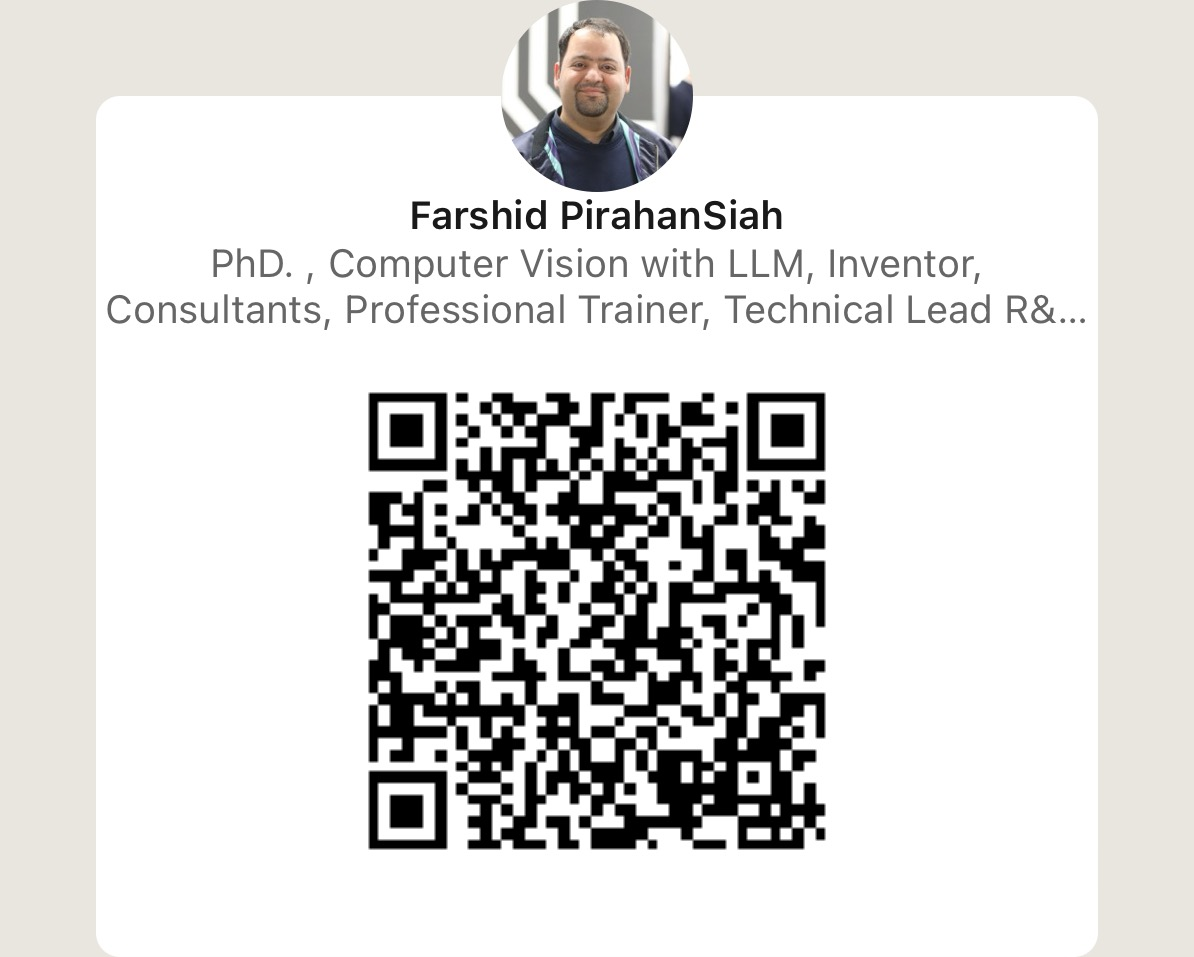